# Problem 11.25
Last update: 14 Feb 2022  

Replace the circuit in [1] to the left of terminals a-b by its Thevenin equivalent and find V.

The net list for the schematic:  
~~~
R1 2 0 6
R2 3 2 6
R3 0 3 6
L1 2 0 j2
L2 1 3 j3
C1 1 2 -j3
C2 3 0 -j2
I1 0 1 -1-j1
~~~

Replacing the complex values for real values assuming a frequency of 1 radian per second.
~~~
R1 2 0 6
R2 3 2 6
R3 0 3 6
L1 2 0 2
L2 1 3 3
C1 1 2 0.33
C2 3 0 0.5
I1 0 1 1
~~~

Equations generated

~~~
[[Eq(C1*s*v1 - C1*s*v2 + I_L2, I1)],
[Eq(-C1*s*v1 + I_L1 + v2*(C1*s + 1/R2 + 1/R1) - v3/R2, 0)],
[Eq(-I_L2 + v3*(C2*s + 1/R3 + 1/R2) - v2/R2, 0)],
[Eq(-I_L1*L1*s + v2, 0)],
[Eq(-I_L2*L2*s + v1 - v3, 0)]]
~~~

Reference
1. Basic Electric Circuit Analysis, D. E. Johnson, J. L. Hilburn, and J. R. Johnson, Prentice-Hall, 1978

In [58]:
from sympy import *
import numpy as np
init_printing()

## Find the open circuit voltage, Voc
Removing R3 and C2 from the netlist, this gives Voc = V3. The net list is:  
~~~
R1 2 0 6
R2 3 2 6
*R3 0 3 6
L1 2 0 2
L2 1 3 3
C1 1 2 0.33
*C2 3 0 0.5
I1 0 1 1
~~~

Network equations generated by the node analysis code:  
~~~
[Eq(C1*s*v1 - C1*s*v2 + I_L2, I1)],
[Eq(-C1*s*v1 + I_L1 + v2*(C1*s + 1/R2 + 1/R1) - v3/R2, 0)],
[Eq(-I_L2 - v2/R2 + v3/R2, 0)],
[Eq(-I_L1*L1*s + v2, 0)],
[Eq(-I_L2*L2*s + v1 - v3, 0)]
~~~

In [59]:
# declare the following symbols
v2, C1, R2, I1, R1, s, I_L1, I_L2, L1, v3, v1, L2 = symbols('v2 C1 R2 I1 R1 s I_L1 I_L2 L1 v3 v1 L2')

copy the equation generated by nodal analysis

In [60]:
# use the equations generated by nodal analysis
equ = Matrix([[Eq(C1*s*v1 - C1*s*v2 + I_L2, I1)], [Eq(-C1*s*v1 + I_L1 + v2*(C1*s + 1/R2 + 1/R1) - v3/R2, 0)], [Eq(-I_L2 - v2/R2 + v3/R2, 0)], [Eq(-I_L1*L1*s + v2, 0)], [Eq(-I_L2*L2*s + v1 - v3, 0)]])
equ

⎡        C₁⋅s⋅v₁ - C₁⋅s⋅v₂ + I_L2 = I₁         ⎤
⎢                                              ⎥
⎢                     ⎛       1    1 ⎞   v₃    ⎥
⎢-C₁⋅s⋅v₁ + I_L1 + v₂⋅⎜C₁⋅s + ── + ──⎟ - ── = 0⎥
⎢                     ⎝       R₂   R₁⎠   R₂    ⎥
⎢                                              ⎥
⎢                     v₂   v₃                  ⎥
⎢             -I_L2 - ── + ── = 0              ⎥
⎢                     R₂   R₂                  ⎥
⎢                                              ⎥
⎢             -I_L1⋅L₁⋅s + v₂ = 0              ⎥
⎢                                              ⎥
⎣           -I_L2⋅L₂⋅s + v₁ - v₃ = 0           ⎦

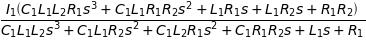

In [61]:
# find symbolic Voc
u = solve(equ,[v1, v2, v3, I_L1, I_L2])
Voc_sym = u[v3]
Voc_sym

In [62]:
# find a numerical solution, substitute the element values
equ1a = equ.subs({L1:2, L2:3, R1:6, R2:6, C1:1/3, I1:-1-1j, s:1j})
equ1a  # display the equations

⎡ I_L2 + 0.333333333333333⋅ⅈ⋅v₁ - 0.333333333333333⋅ⅈ⋅v₂ = -1.0 - 1.0⋅ⅈ ⎤
⎢                                                                       ⎥
⎢                                                                 v₃    ⎥
⎢I_L1 - 0.333333333333333⋅ⅈ⋅v₁ + v₂⋅(1/3 + 0.333333333333333⋅ⅈ) - ── = 0⎥
⎢                                                                 6     ⎥
⎢                                                                       ⎥
⎢                                  v₂   v₃                              ⎥
⎢                          -I_L2 - ── + ── = 0                          ⎥
⎢                                  6    6                               ⎥
⎢                                                                       ⎥
⎢                         -2.0⋅ⅈ⋅I_L1 + v₂ = 0                          ⎥
⎢                                                                       ⎥
⎣                       -3.0⋅ⅈ⋅I_L2 + v₁ - v₃ = 0                       ⎦

In [63]:
# solve for the unknowns
u1 = solve(equ1a,[v1, v2, v3, I_L1, I_L2])
u1

In [64]:
Voc = u1[v3]
Voc

## Find the short circuit current, Isc
Comment C2 and R3, set node 3 to zero, find current in L2 and R2.  New net list:

~~~
R1 2 0 6
R2 0 2 6
*R3 0 3 6
L1 2 0 2
L2 1 0 3
C1 1 2 0.33
*C2 3 0 0.5
I1 0 1 1
~~~

Equations generated

~~~
[Eq(C1*s*v1 - C1*s*v2 + I_L2, I1)],
[Eq(-C1*s*v1 + I_L1 + v2*(C1*s + 1/R2 + 1/R1), 0)],
[Eq(-I_L1*L1*s + v2, 0)],
[Eq(-I_L2*L2*s + v1, 0)]]
~~~

In [65]:
v2, C1, R2, I1, R1, s, I_L1, I_L2, R3, L1, v3, v1, L2 = symbols('v2 C1 R2 I1 R1 s I_L1 I_L2 R3, L1 v3 v1 L2')

copy the equation generated by nodal analysis

In [66]:
equ = Matrix([[Eq(C1*s*v1 - C1*s*v2 + I_L2, I1)], [Eq(-C1*s*v1 + I_L1 + v2*(C1*s + 1/R2 + 1/R1), 0)], [Eq(-I_L1*L1*s + v2, 0)], [Eq(-I_L2*L2*s + v1, 0)]])
equ

⎡      C₁⋅s⋅v₁ - C₁⋅s⋅v₂ + I_L2 = I₁      ⎤
⎢                                         ⎥
⎢                     ⎛       1    1 ⎞    ⎥
⎢-C₁⋅s⋅v₁ + I_L1 + v₂⋅⎜C₁⋅s + ── + ──⎟ = 0⎥
⎢                     ⎝       R₂   R₁⎠    ⎥
⎢                                         ⎥
⎢           -I_L1⋅L₁⋅s + v₂ = 0           ⎥
⎢                                         ⎥
⎣           -I_L2⋅L₂⋅s + v₁ = 0           ⎦

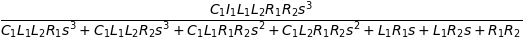

In [67]:
# solve symbolically
u = solve(equ,[v1, v2, v3, I_L1, I_L2])
V2_sym = u[v2]
V2_sym

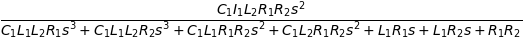

In [68]:
I_L1_sym = u[I_L1]
I_L1_sym

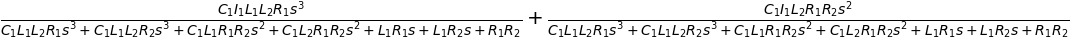

In [69]:
Isc_sym = V2_sym/R2 + I_L1_sym
Isc_sym

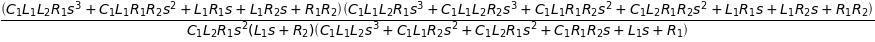

In [70]:
# find the Thevenin equivalent impedance
Zth_sym = simplify(Voc_sym/Isc_sym)
Zth_sym

In [71]:
# solve numerically, enter the element values
equ1a = equ.subs({L1:2, L2:3, R1:6, R2:6, C1:1/3, I1:-1-1j, s:1j})
equ1a  # display the equations

⎡I_L2 + 0.333333333333333⋅ⅈ⋅v₁ - 0.333333333333333⋅ⅈ⋅v₂ = -1.0 - 1.0⋅ⅈ⎤
⎢                                                                     ⎥
⎢ I_L1 - 0.333333333333333⋅ⅈ⋅v₁ + v₂⋅(1/3 + 0.333333333333333⋅ⅈ) = 0  ⎥
⎢                                                                     ⎥
⎢                        -2.0⋅ⅈ⋅I_L1 + v₂ = 0                         ⎥
⎢                                                                     ⎥
⎣                        -3.0⋅ⅈ⋅I_L2 + v₁ = 0                         ⎦

In [72]:
u1 = solve(equ1a,[v1, v2, v3, I_L1, I_L2])
u1

Current in I_R2 = V2/R2

In [73]:
Isc = u1[v2]/6 + u1[I_L2]
Isc

In [74]:
Zth = simplify(Voc/Isc)
Zth

## Find V3
Second part of the problem is to find the voltage across a-b, which is V3. The net list: 
~~~
R1 2 0 6
R2 3 2 6
R3 0 3 6
L1 2 0 2
L2 1 3 3
C1 1 2 0.33
C2 3 0 0.5
I1 0 1 1
~~~

Equations generated

~~~
[Eq(C1*s*v1 - C1*s*v2 + I_L2, I1)],
[Eq(-C1*s*v1 + I_L1 + v2*(C1*s + 1/R2 + 1/R1) - v3/R2, 0)],
[Eq(-I_L2 + v3*(C2*s + 1/R3 + 1/R2) - v2/R2, 0)],
[Eq(-I_L1*L1*s + v2, 0)],
[Eq(-I_L2*L2*s + v1 - v3, 0)]])'
~~~

copy the symbols used in nodal analysis

In [75]:
v2, C1, R2, I1, R1, s, I_L1, I_L2, C2, R3, L1, v3, v1, L2 = symbols('v2 C1 R2 I1 R1 s I_L1 I_L2 C2 R3 L1 v3 v1 L2')

copy the equation generated by nodal analysis

In [76]:
equ = Matrix([[Eq(C1*s*v1 - C1*s*v2 + I_L2, I1)], [Eq(-C1*s*v1 + I_L1 + v2*(C1*s + 1/R2 + 1/R1) - v3/R2, 0)], [Eq(-I_L2 + v3*(C2*s + 1/R3 + 1/R2) - v2/R2, 0)], [Eq(-I_L1*L1*s + v2, 0)], [Eq(-I_L2*L2*s + v1 - v3, 0)]])
equ

⎡        C₁⋅s⋅v₁ - C₁⋅s⋅v₂ + I_L2 = I₁         ⎤
⎢                                              ⎥
⎢                     ⎛       1    1 ⎞   v₃    ⎥
⎢-C₁⋅s⋅v₁ + I_L1 + v₂⋅⎜C₁⋅s + ── + ──⎟ - ── = 0⎥
⎢                     ⎝       R₂   R₁⎠   R₂    ⎥
⎢                                              ⎥
⎢                ⎛       1    1 ⎞   v₂         ⎥
⎢     -I_L2 + v₃⋅⎜C₂⋅s + ── + ──⎟ - ── = 0     ⎥
⎢                ⎝       R₃   R₂⎠   R₂         ⎥
⎢                                              ⎥
⎢             -I_L1⋅L₁⋅s + v₂ = 0              ⎥
⎢                                              ⎥
⎣           -I_L2⋅L₂⋅s + v₁ - v₃ = 0           ⎦

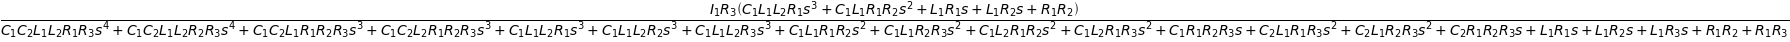

In [77]:
u = solve(equ,[v1, v2, v3, I_L1, I_L2])
v3_sym = u[v3]
v3_sym

In [78]:
# enter the element values
equ1a = equ.subs({L1:2, L2:3, R1:6, R2:6, R3:6, C1:1/3, C2:1/2, I1:-1-1j, s:1j})
equ1a  # display the equations

⎡ I_L2 + 0.333333333333333⋅ⅈ⋅v₁ - 0.333333333333333⋅ⅈ⋅v₂ = -1.0 - 1.0⋅ⅈ ⎤
⎢                                                                       ⎥
⎢                                                                 v₃    ⎥
⎢I_L1 - 0.333333333333333⋅ⅈ⋅v₁ + v₂⋅(1/3 + 0.333333333333333⋅ⅈ) - ── = 0⎥
⎢                                                                 6     ⎥
⎢                                                                       ⎥
⎢                           v₂                                          ⎥
⎢                   -I_L2 - ── + v₃⋅(1/3 + 0.5⋅ⅈ) = 0                   ⎥
⎢                           6                                           ⎥
⎢                                                                       ⎥
⎢                         -2.0⋅ⅈ⋅I_L1 + v₂ = 0                          ⎥
⎢                                                                       ⎥
⎣                       -3.0⋅ⅈ⋅I_L2 + v₁ - v₃ = 0                       ⎦

In [79]:
u1 = solve(equ1a,[v1, v2, v3, I_L1, I_L2])
u1

In [80]:
V3 = u1[v3]
V3